In [1]:
#  Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, 
# accuracy, error rate, precision and recall on the given dataset. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 nearest neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = knn.predict(X_test)


Accuracy: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       100
           1       0.58      0.59      0.59        54

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



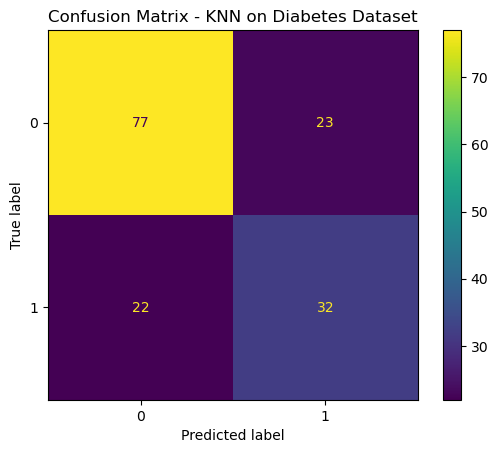

In [11]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - KNN on Diabetes Dataset")
plt.show()
